In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.graphics.api as smg

In [5]:
df = pd.read_csv('E:/Download_2/project_1.csv')

#Reduce irrelevant or duplicate features
df.drop(['lat', 'lon'], axis=1, inplace=True) # only one location

df.drop(['Temp_Max_C'], axis=1, inplace=True) # using average temperature to measure overall heat level

df.drop(['Snowfall_mm_s', 'Precipitation_mm_s'], axis=1, inplace=True) #cumulative rainfall/snowfall is more intuitive than per second

df.drop(['Wind_U_(m/s)', 'Wind_V_(m/s)'], axis=1, inplace=True) #only focus on speed



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27374 entries, 0 to 27373
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time                         27374 non-null  object 
 1   Radiation_Longwave_(W/m^2)   27374 non-null  float64
 2   Radiation_Shortwave_(W/m^2)  27374 non-null  float64
 3   Humidity_(kg/kg)             27374 non-null  float64
 4   Temp_Avg_C                   27374 non-null  float64
 5   Precipitation_mm_day         27374 non-null  float64
 6   Snowfall_mm_day              27374 non-null  float64
 7   Year                         27374 non-null  int64  
 8   Month                        27374 non-null  int64  
 9   Day                          27374 non-null  int64  
 10  DayOfWeek                    27374 non-null  int64  
 11  Month_Name                   27374 non-null  object 
 12  Day_Name                     27374 non-null  object 
 13  Wind_Speed      

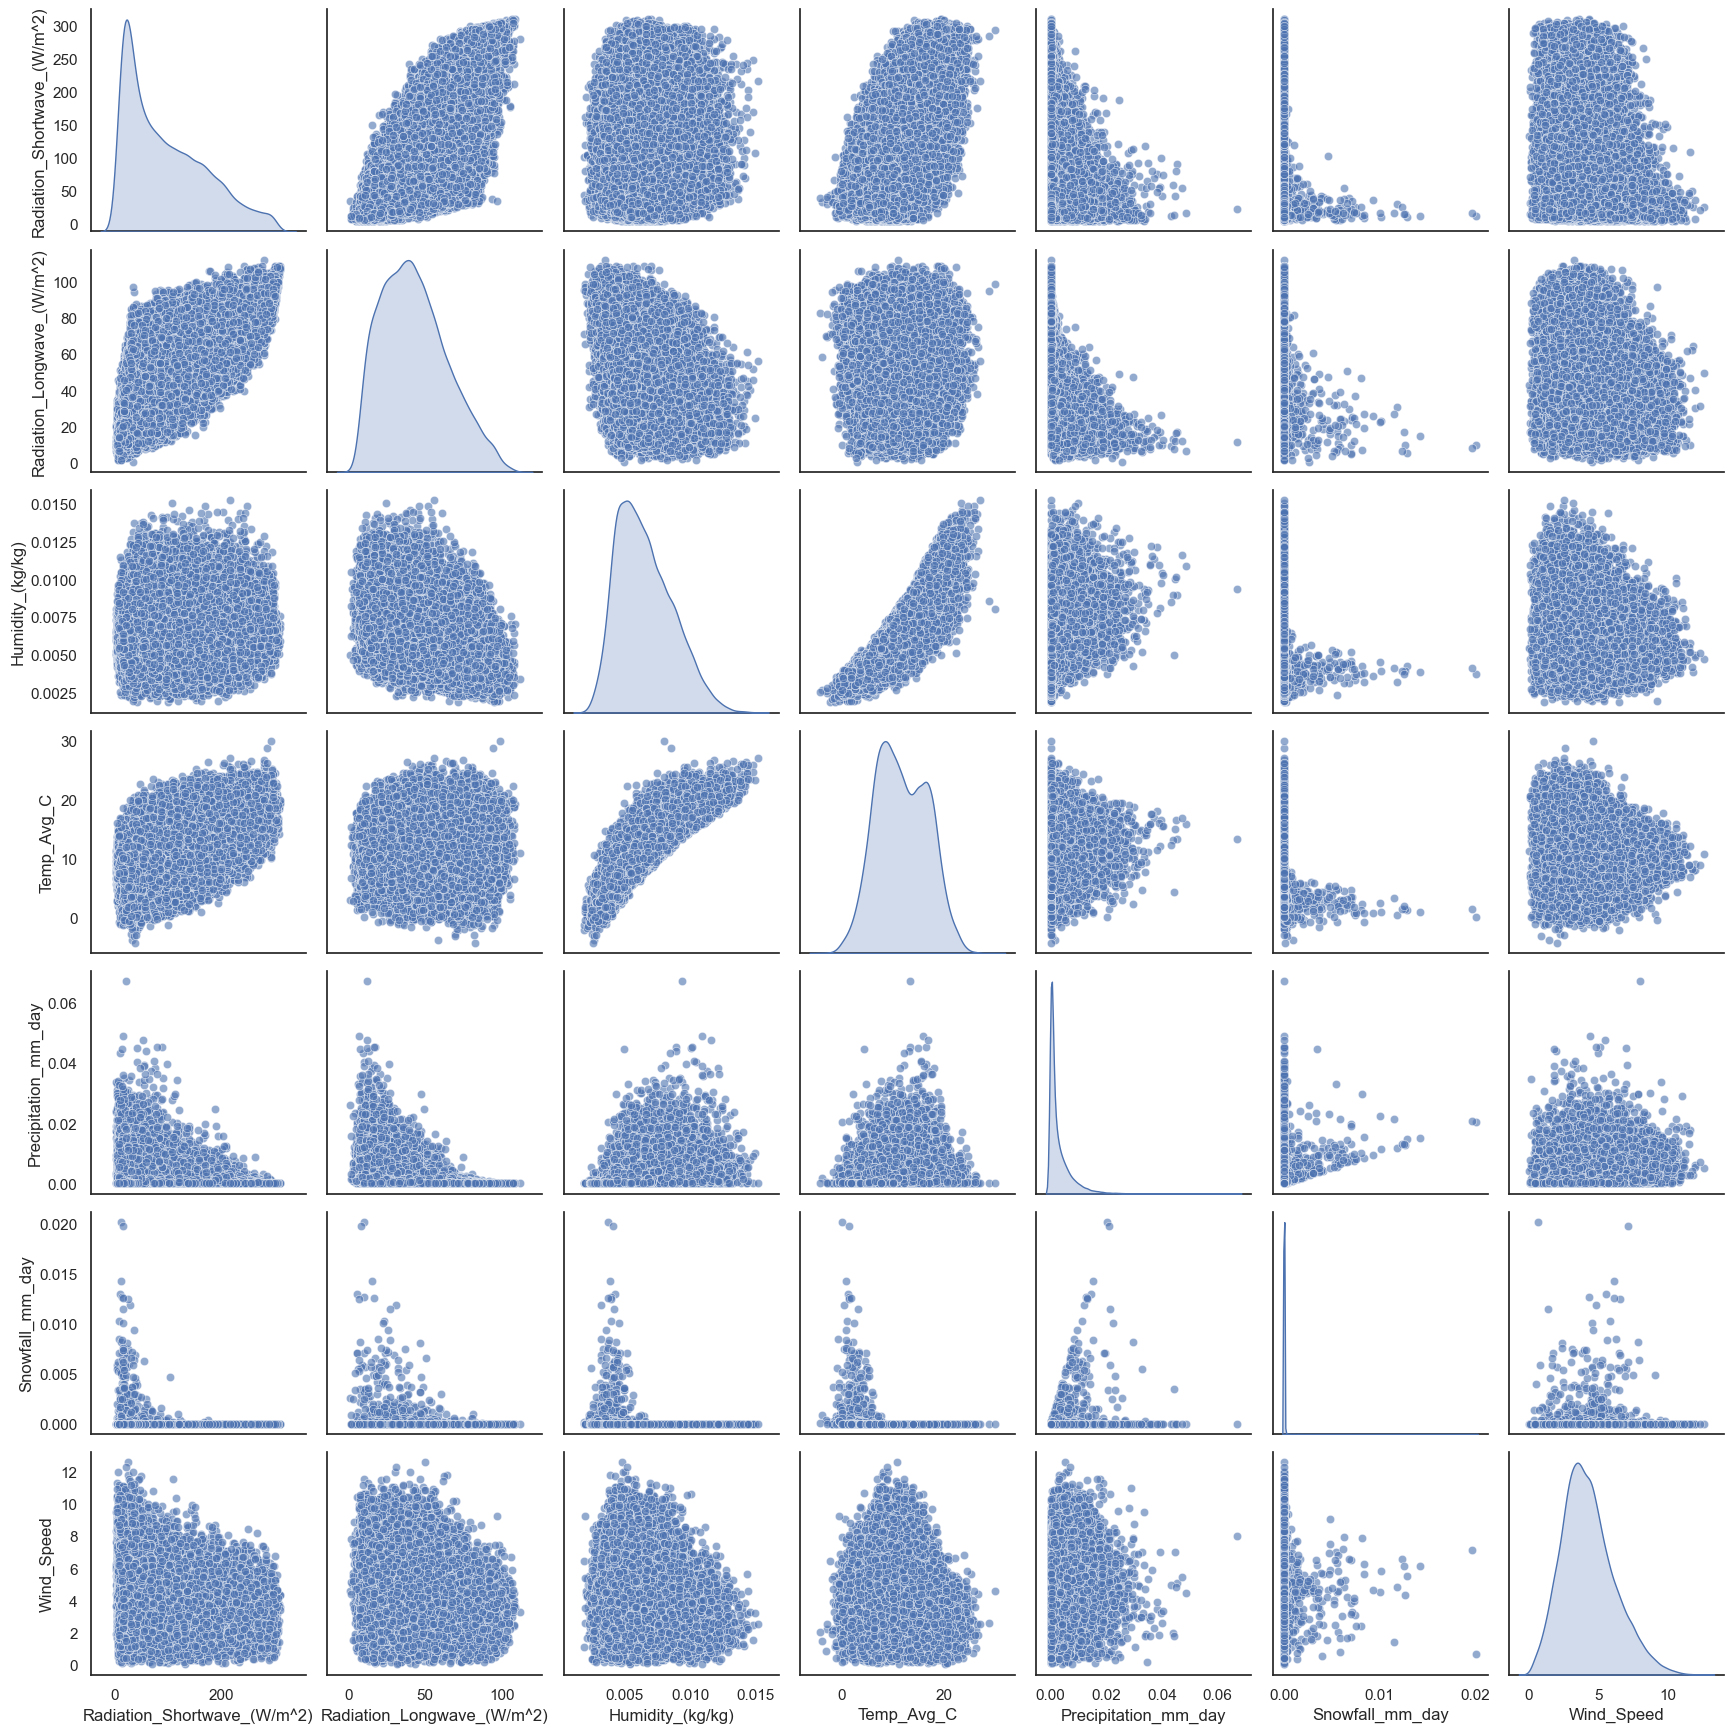

In [40]:
# Draw a scatter plot matrix

sns.set(style='white') 
sns.pairplot(df, 
             vars=[
                 'Radiation_Shortwave_(W/m^2)', 
                 'Radiation_Longwave_(W/m^2)',
                 'Humidity_(kg/kg)', 
                 'Temp_Avg_C', 
                 'Precipitation_mm_day', 
                 'Snowfall_mm_day', 
                 'Wind_Speed',
             ],
             diag_kind='kde',
             plot_kws={'alpha':0.6})

plt.tight_layout()
plt.show()

                             Radiation_Longwave_(W/m^2)  \
Radiation_Longwave_(W/m^2)                     1.000000   
Radiation_Shortwave_(W/m^2)                    0.683627   
Humidity_(kg/kg)                              -0.304497   
Temp_Avg_C                                     0.025457   
Precipitation_mm_day                          -0.473853   
Snowfall_mm_day                               -0.059749   
Wind_Speed                                    -0.164967   

                             Radiation_Shortwave_(W/m^2)  Humidity_(kg/kg)  \
Radiation_Longwave_(W/m^2)                      0.683627         -0.304497   
Radiation_Shortwave_(W/m^2)                     1.000000          0.251489   
Humidity_(kg/kg)                                0.251489          1.000000   
Temp_Avg_C                                      0.605906          0.876221   
Precipitation_mm_day                           -0.329469          0.213600   
Snowfall_mm_day                                -0.064145   

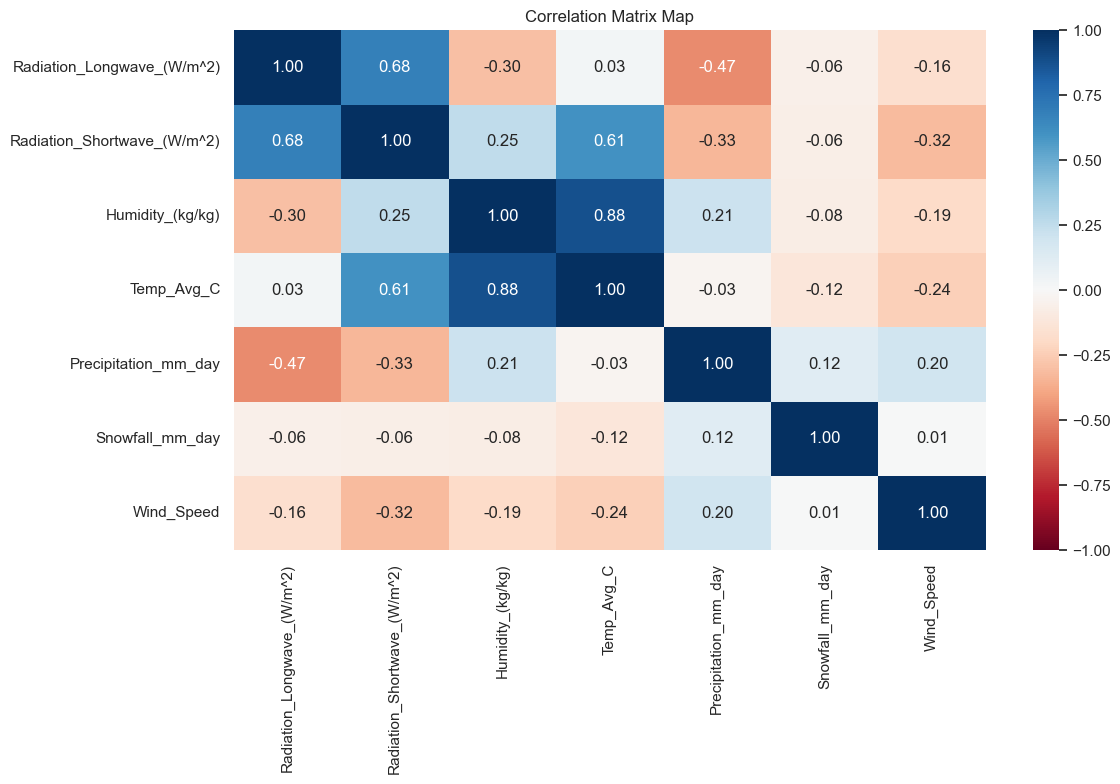

In [42]:
# Correlation Matrix

df.drop(['Year', 'Month', 'Day', 'DayOfWeek'], axis=1, inplace=True)

df_numeric = df.select_dtypes(include = [np.number]).copy()


corr_matrix = df_numeric.corr(method = 'pearson')

print(corr_matrix)

plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'RdBu', vmin = -1, vmax = 1)
plt.title('Correlation Matrix Map')
plt.tight_layout()
plt.show()

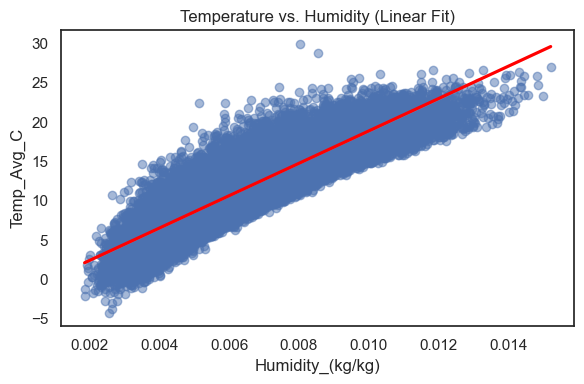

In [38]:
# Linear regression scatter plot of temperature and humidity

sns.set_style("white")
plt.figure(figsize=(6, 4))
sns.regplot(
    data=df, 
    x='Humidity_(kg/kg)', 
    y='Temp_Avg_C',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('Temperature vs. Humidity (Linear Fit)')
plt.tight_layout()
plt.show()

In [129]:

X = df[['Humidity_(kg/kg)']]
y = df['Temp_Avg_C']


X = sm.add_constant(X)

# OLS
model1 = sm.OLS(y, X).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:             Temp_Avg_C   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                 9.049e+04
Date:                Mon, 17 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:33:07   Log-Likelihood:                -62873.
No. Observations:               27374   AIC:                         1.257e+05
Df Residuals:                   27372   BIC:                         1.258e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.6927      0.047  

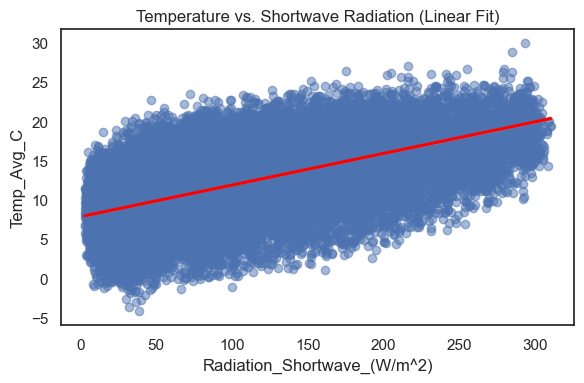

In [47]:
# Linear regression scatter plot of temperature and shortwave radiation

sns.set_style("white")
plt.figure(figsize=(6, 4))
sns.regplot(
    data=df, 
    x='Radiation_Shortwave_(W/m^2)', 
    y='Temp_Avg_C',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('Temperature vs. Shortwave Radiation (Linear Fit)')
plt.tight_layout()
plt.show()

In [49]:
X2 = df[['Radiation_Shortwave_(W/m^2)']]
y2 = df['Temp_Avg_C']

X2 = sm.add_constant(X2)

# OLS
model2 = sm.OLS(y2, X2).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:             Temp_Avg_C   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:20:15   Log-Likelihood:                -76594.
No. Observations:               27374   AIC:                         1.532e+05
Df Residuals:                   27372   BIC:                         1.532e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

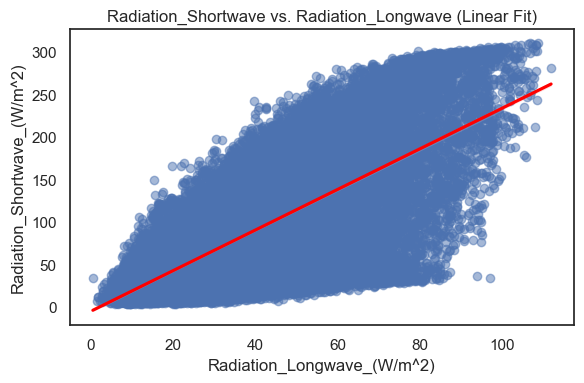

In [51]:
# Linear regression scatter plot of temperature and shortwave radiation

sns.set_style("white")
plt.figure(figsize=(6, 4))
sns.regplot(
    data=df, 
    x='Radiation_Longwave_(W/m^2)', 
    y='Radiation_Shortwave_(W/m^2)',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('Radiation_Shortwave vs. Radiation_Longwave (Linear Fit)')
plt.tight_layout()
plt.show()

In [53]:
X3 = df[['Radiation_Longwave_(W/m^2)']]
y3 = df['Radiation_Shortwave_(W/m^2)']

X3 = sm.add_constant(X3)

# OLS
model3 = sm.OLS(y3, X3).fit()
print(model3.summary())


                                 OLS Regression Results                                
Dep. Variable:     Radiation_Shortwave_(W/m^2)   R-squared:                       0.467
Model:                                     OLS   Adj. R-squared:                  0.467
Method:                          Least Squares   F-statistic:                 2.402e+04
Date:                         Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                                 18:32:32   Log-Likelihood:            -1.4843e+05
No. Observations:                        27374   AIC:                         2.969e+05
Df Residuals:                            27372   BIC:                         2.969e+05
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [9]:
# Select a column
cols = ['Humidity_(kg/kg)', 'Radiation_Shortwave_(W/m^2)', 'Temp_Avg_C']
df_model = df[cols].dropna()

# Set feature X and target y

X = df_model[['Humidity_(kg/kg)', 'Radiation_Shortwave_(W/m^2)']]
y = df_model['Temp_Avg_C']


# Standardization to prevent the dimension gap between variables from being too large
X_scaled = (X - X.mean()) / X.std()

X_const = sm.add_constant(X_scaled)

# VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_const.columns  # 包含 const
vif_data['VIF'] = [
    variance_inflation_factor(X_const.values, i) 
    for i in range(X_const.shape[1])
]

print("=== VIF ===")
print(vif_data)

# Multiple Linear Regression

model = sm.OLS(y, X_const).fit()
print("\n=== Regression Results ===")
print(model.summary())


=== VIF ===
                       feature       VIF
0                        const  1.000000
1             Humidity_(kg/kg)  1.067517
2  Radiation_Shortwave_(W/m^2)  1.067517

=== Regression Results ===
                            OLS Regression Results                            
Dep. Variable:             Temp_Avg_C   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Wed, 19 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:56:03   Log-Likelihood:                -47137.
No. Observations:               27374   AIC:                         9.428e+04
Df Residuals:                   27371   BIC:                         9.430e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
      

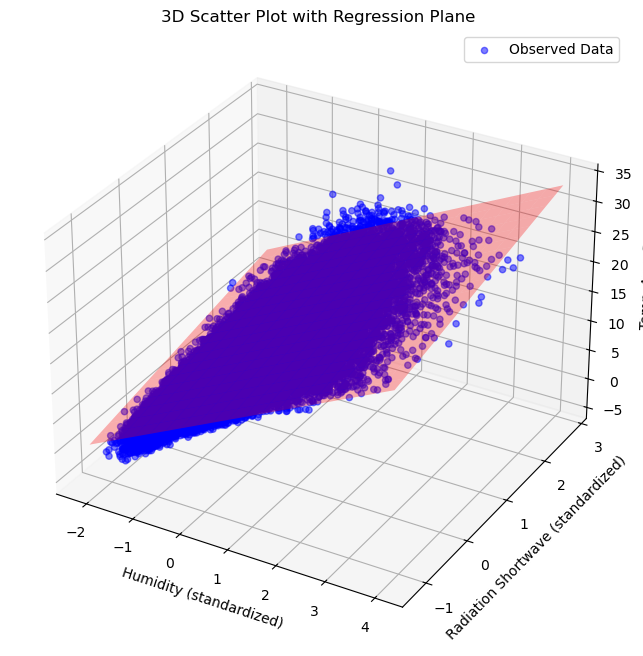

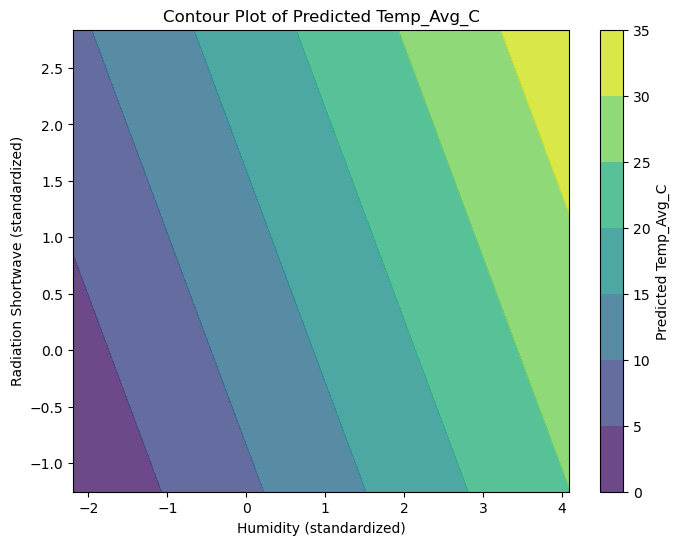

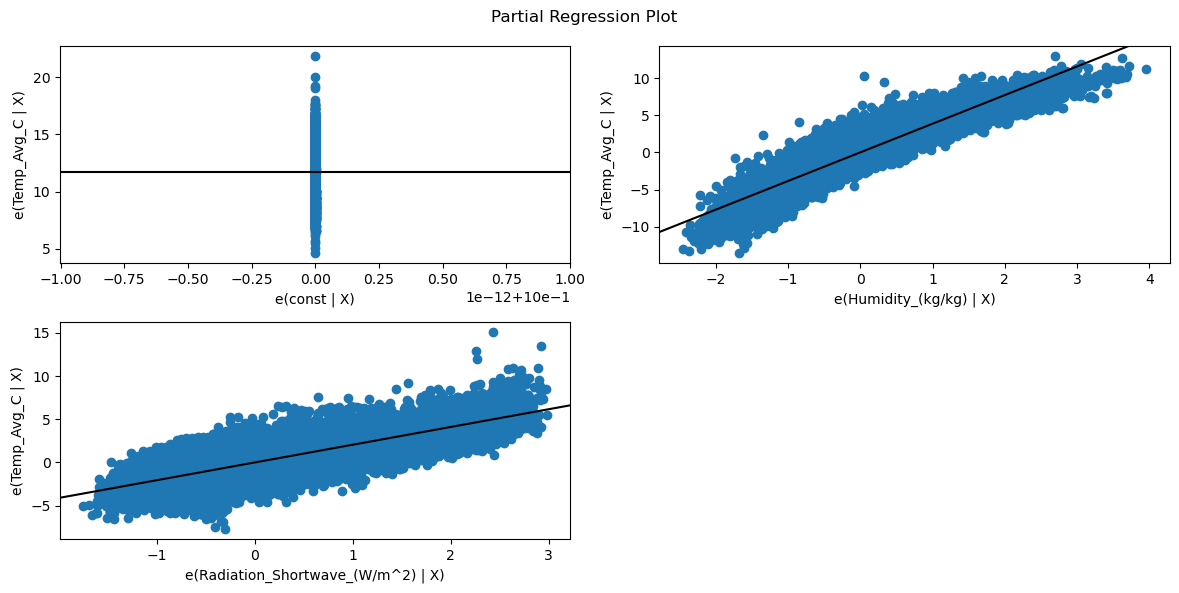

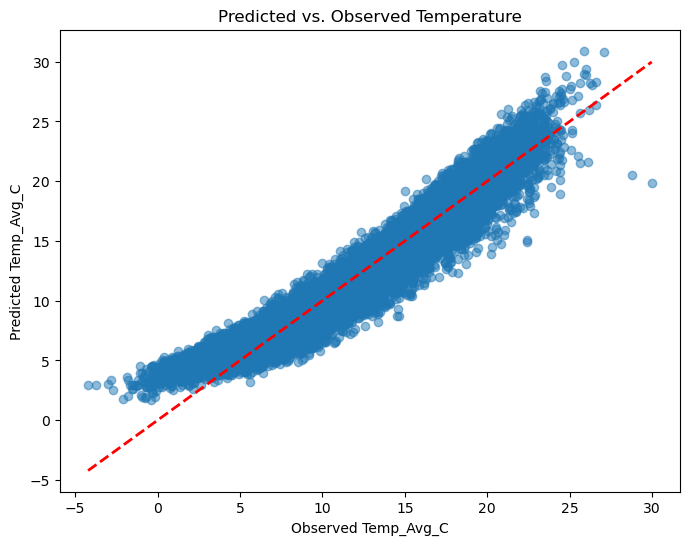

In [19]:
#Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Extracting standardized data from independent variables
x1 = X_scaled['Humidity_(kg/kg)'].values
x2 = X_scaled['Radiation_Shortwave_(W/m^2)'].values
z = y.values

# Draw actual observation data points
ax.scatter(x1, x2, z, color='blue', alpha=0.5, label='Observed Data')

# drawing regression planes
x1_range = np.linspace(x1.min(), x1.max(), 20)
x2_range = np.linspace(x2.min(), x2.max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# DataFrame
grid_df = pd.DataFrame({
    'Humidity_(kg/kg)': x1_grid.ravel(),
    'Radiation_Shortwave_(W/m^2)': x2_grid.ravel()
})
grid_df_const = sm.add_constant(grid_df)

# Predicted temperature
z_pred = model.predict(grid_df_const).values.reshape(x1_grid.shape)

# Draw a regression plane
ax.plot_surface(x1_grid, x2_grid, z_pred, color='red', edgecolor='none', alpha=0.3)


ax.set_xlabel('Humidity (standardized)')
ax.set_ylabel('Radiation Shortwave (standardized)')
ax.set_zlabel('Temp_Avg_C')
ax.set_title('3D Scatter Plot with Regression Plane')
plt.legend()
plt.show()

# Contour Plot
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(x1_grid, x2_grid, z_pred, cmap='viridis', alpha=0.8)
ax.set_xlabel('Humidity (standardized)')
ax.set_ylabel('Radiation Shortwave (standardized)')
ax.set_title('Contour Plot of Predicted Temp_Avg_C')
cbar = plt.colorbar(contour)
cbar.set_label('Predicted Temp_Avg_C')
plt.show()

# 2.3 Partial Regression Plots
fig = plt.figure(figsize=(12, 6))
smg.plot_partregress_grid(model, fig=fig)
plt.tight_layout()
plt.show()

# Comparison chart of predicted values ​​and actual values
y_pred = model.predict(X_const)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Observed Temp_Avg_C')
plt.ylabel('Predicted Temp_Avg_C')
plt.title('Predicted vs. Observed Temperature')
plt.show()